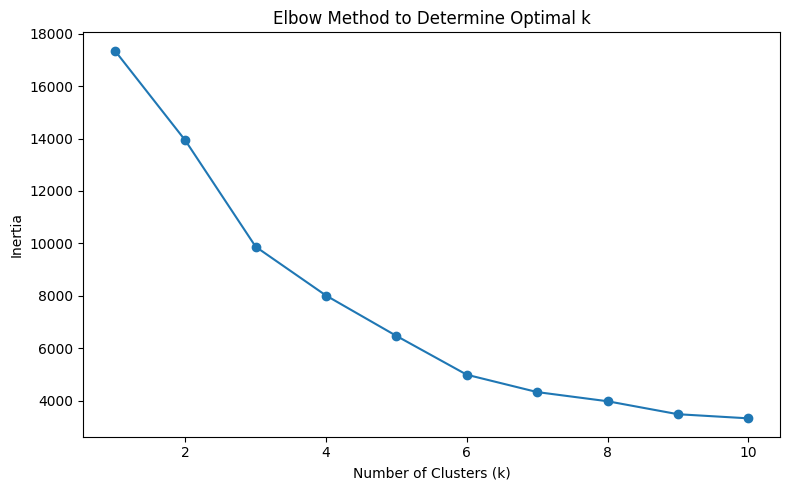

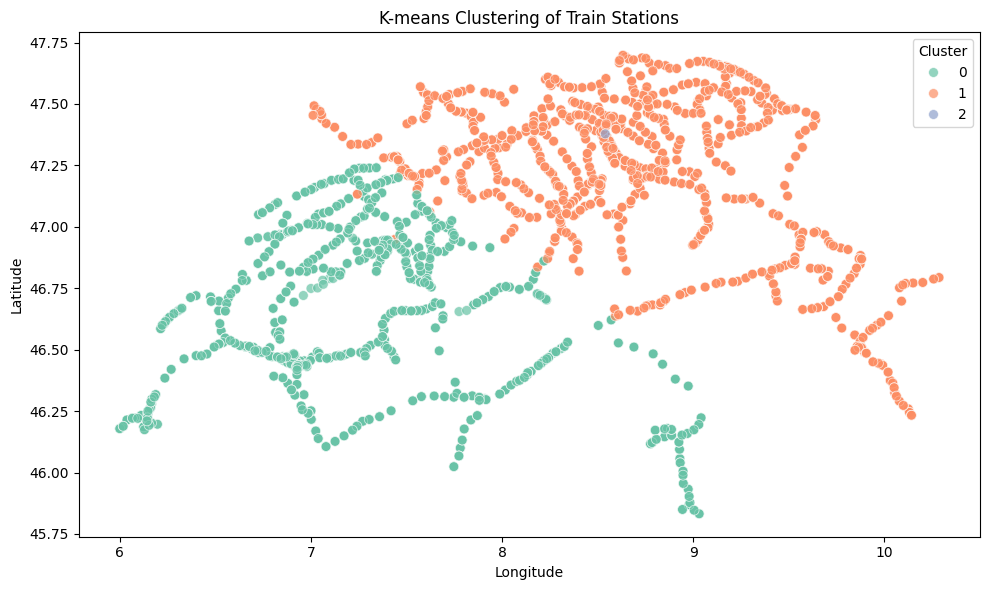

Cluster Characteristics:
                   DWV           DNWV  DWV_DNWV_Ratio
Cluster                                              
0          2221.135870    1455.875000        1.671718
1          3891.473684    2548.685714        1.586100
2        417266.666667  325300.000000        1.284464


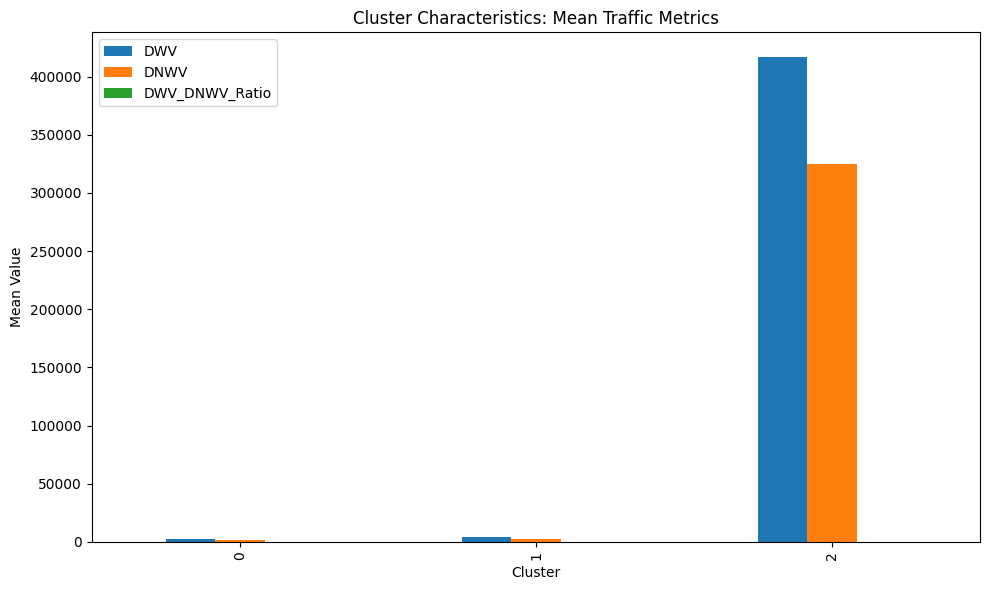

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'data_prepared.csv'  # Replace with your actual CSV path
data = pd.read_csv(data_path)

# Preprocess the data
# Convert relevant columns to numeric if needed
for col in ['DWV', 'DNWV', 'lon', 'lat']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in relevant columns
data = data.dropna(subset=['DWV', 'DNWV', 'lon', 'lat'])

# Feature Engineering: Calculate DWV/DNWV ratio
data['DWV_DNWV_Ratio'] = data['DWV'] / data['DNWV']

# Standardize data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['DWV', 'DNWV', 'DWV_DNWV_Ratio', 'lon', 'lat']])

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('elbow_method.png')
plt.show()

# Apply K-means clustering with the optimal k (assume k=3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters in Latitude and Longitude Space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='lon', y='lat', hue='Cluster', palette='Set2', s=50, alpha=0.7)
plt.title('K-means Clustering of Train Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('clusters_map.png')
plt.show()

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster')[['DWV', 'DNWV', 'DWV_DNWV_Ratio']].mean()
print("Cluster Characteristics:")
print(cluster_summary)

# Visualize Cluster Characteristics
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Characteristics: Mean Traffic Metrics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.tight_layout()
plt.savefig('cluster_characteristics.png')
plt.show()
